RandomForest (MICE-imputed) Accuracy: 0.8101


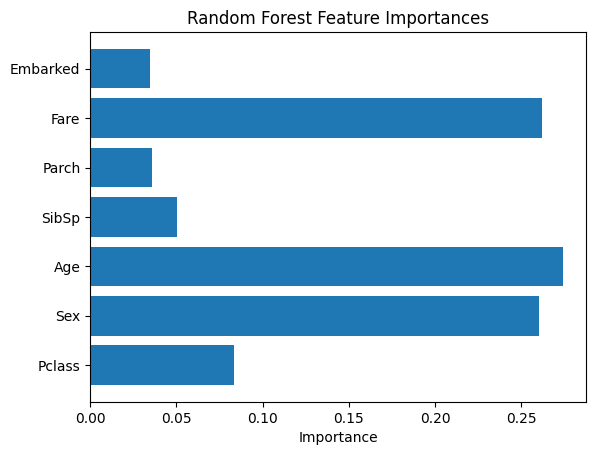

In [2]:
# --- 1. Imports and Data Loading ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('../titanic.csv')

# --- 2. Minimal Preprocessing ---
# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features (remove irrelevant columns)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_raw = df[features]
y = df['Survived']

# --- 3. Imputation with MICE (IterativeImputer) ---
# Impute only features (not the target)
imputer = IterativeImputer(random_state=42)
X_imputed = imputer.fit_transform(X_raw)
X = pd.DataFrame(X_imputed, columns=features)

# --- 4. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Model Training and Evaluation ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"RandomForest (MICE-imputed) Accuracy: {acc:.4f}")

# --- Optionally: Feature importances ---
import matplotlib.pyplot as plt
import numpy as np

feat_importances = clf.feature_importances_
plt.barh(features, feat_importances)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [3]:
# Create a deployment file pkl

import joblib
joblib.dump(clf, 'random_forest_mice.pkl')

['random_forest_mice.pkl']